## Question 2

### Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [4]:
df = pd.read_excel('Dataset_Question2.xlsx', sheet_name = 'Sheet1')
df.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass


In [5]:
#Changing the 'Test' column to have binary values
def test(result):
    if (result == 'Pass'):
        return 1
    elif (result == 'Fail'):
        return 0

In [6]:
df['Test'] = df.apply(lambda x: test(x['Test']), axis = 1)

In [7]:
df.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,1
1,693.39,24.66,133.18,3138.96,0.3785,1
2,523.10,23.23,146.55,1058.24,0.4799,0
3,612.86,40.97,94.44,1325.12,0.3147,0
4,500.28,37.44,185.48,2474.51,0.2284,1


### Information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Temperature                     1000 non-null float64
Pressure                        1000 non-null float64
Feed Flow rate                  1000 non-null float64
Coolant Flow rate               1000 non-null float64
Inlet reactant concentration    1000 non-null float64
Test                            1000 non-null int64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [9]:
df.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,546.76643,25.493270,125.029060,2295.797770,0.302692,0.585000
std,86.85878,14.252407,43.508159,763.680625,0.116062,0.492969
min,400.31000,1.060000,50.030000,1002.530000,0.100300,0.000000
25%,469.73500,12.725000,88.587500,1635.682500,0.199075,0.000000
50%,545.80000,25.375000,124.590000,2268.710000,0.308850,1.000000
75%,618.87750,37.820000,162.562500,2983.692500,0.401625,1.000000
max,699.87000,49.890000,199.960000,3595.620000,0.499600,1.000000


In [10]:
df.groupby('Test').mean()   

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
Test,,,,,
0,547.634964,26.320747,129.829783,1605.060819,0.301568
1,546.150291,24.906256,121.623419,2785.807744,0.303489


### Defining training and testing data

In [11]:
train_data = df[:700]
test_data = df[700:]

In [12]:
train_data.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,546.335771,25.297943,124.561600,2267.438900,0.299250,0.568571
std,87.246427,14.279063,42.886222,762.900877,0.114895,0.495630
min,400.310000,1.190000,50.030000,1002.530000,0.100300,0.000000
25%,466.757500,12.670000,89.170000,1611.775000,0.196200,0.000000
50%,547.945000,24.830000,122.945000,2203.135000,0.304100,1.000000
75%,616.622500,38.017500,161.285000,2958.845000,0.397525,1.000000
max,699.870000,49.890000,199.960000,3595.620000,0.499600,1.000000


In [13]:
test_data.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,547.771300,25.949033,126.119800,2361.968467,0.310724,0.623333
std,86.083982,14.203337,44.979991,762.669920,0.118547,0.485360
min,400.470000,1.060000,51.010000,1016.740000,0.100300,0.000000
25%,476.092500,13.400000,85.887500,1705.002500,0.208075,0.000000
50%,537.355000,26.430000,129.705000,2415.425000,0.322100,1.000000
75%,621.695000,37.647500,166.055000,3048.412500,0.415100,1.000000
max,698.230000,49.790000,199.910000,3587.690000,0.499400,1.000000


In [14]:
train_data.groupby('Test').mean()    

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
Test,,,,,
0,547.893974,27.032219,130.071755,1602.121060,0.298199
1,545.153417,23.981985,120.380528,2772.278065,0.300047


### Splitting training and testing data into respective input and output data

In [17]:
X_train = train_data.drop('Test', axis = 1)
X_test = test_data.drop('Test', axis = 1).reset_index(drop = True)

In [18]:
y_train = train_data['Test']
y_test = test_data['Test'].reset_index(drop = True)

In [19]:
X_test

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,470.82,4.77,105.06,2794.45,0.1773
1,468.37,17.90,142.48,1895.52,0.1338
2,538.67,27.33,62.59,3560.30,0.1336
3,439.18,8.69,175.98,1474.19,0.2112
4,475.98,24.60,156.80,1696.70,0.3957
...,...,...,...,...,...
295,552.31,11.79,139.23,1624.75,0.2836
296,567.23,49.01,87.39,2826.88,0.3608
297,683.73,40.08,97.00,2145.20,0.2336
298,613.10,34.13,163.23,3172.04,0.3601


In [20]:
#min-max normalisation
X_train = (X_train - X_train.min())/(X_train.max()- X_train.min())
X_test = (X_test - X_test.min())/(X_test.max()- X_test.min())

In [21]:
X_test

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,0.236264,0.076134,0.362995,0.691460,0.192934
1,0.228036,0.345578,0.614305,0.341811,0.083939
2,0.464132,0.539093,0.077770,0.989346,0.083438
3,0.130004,0.156577,0.839288,0.177930,0.277875
4,0.253593,0.483070,0.710477,0.264478,0.740165
...,...,...,...,...,...
295,0.509941,0.220193,0.592478,0.236492,0.459283
296,0.560048,0.983993,0.244325,0.704074,0.652719
297,0.951303,0.800739,0.308865,0.438927,0.334002
298,0.714099,0.678637,0.753660,0.838328,0.650965


### Addding the intercept column to X_train and X_test

In [22]:
array_ones_train = pd.DataFrame(data = np.ones(shape = [X_train.shape[0], 1]), columns = ['Intercept'])
array_ones_test = pd.DataFrame(data = np.ones(shape = [X_test.shape[0], 1]), columns = ['Intercept'])

In [23]:
array_ones_test

,Intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
295,1.0
296,1.0
297,1.0
298,1.0


In [24]:
X_train = pd.concat([array_ones_train, X_train], axis = 1)
X_test = pd.concat([array_ones_test, X_test], axis = 1)

In [25]:
X_train

,Intercept,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,1.0,0.021865,0.338193,0.478890,0.426777,0.007513
1,1.0,0.978368,0.481930,0.554592,0.823894,0.696719
2,1.0,0.409901,0.452567,0.643767,0.021484,0.950664
3,1.0,0.709541,0.816838,0.296205,0.124404,0.536940
4,1.0,0.333723,0.744353,0.903422,0.567655,0.320811
...,...,...,...,...,...,...
695,1.0,0.274703,0.462423,0.000534,0.231816,0.692712
696,1.0,0.563493,0.308830,0.287534,0.015333,0.414976
697,1.0,0.322506,0.477618,0.881745,0.498822,0.978713
698,1.0,0.232508,0.078645,0.332422,0.930982,0.159028


In [26]:
X_test

,Intercept,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,1.0,0.236264,0.076134,0.362995,0.691460,0.192934
1,1.0,0.228036,0.345578,0.614305,0.341811,0.083939
2,1.0,0.464132,0.539093,0.077770,0.989346,0.083438
3,1.0,0.130004,0.156577,0.839288,0.177930,0.277875
4,1.0,0.253593,0.483070,0.710477,0.264478,0.740165
...,...,...,...,...,...,...
295,1.0,0.509941,0.220193,0.592478,0.236492,0.459283
296,1.0,0.560048,0.983993,0.244325,0.704074,0.652719
297,1.0,0.951303,0.800739,0.308865,0.438927,0.334002
298,1.0,0.714099,0.678637,0.753660,0.838328,0.650965


### Defining sigmoid function

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
sigmoid(0)

0.5

In [29]:
#parameter initialisation
initial_theta = X_train.mean()
initial_theta

Intercept                       1.000000
Temperature                     0.487468
Pressure                        0.495030
Feed Flow rate                  0.497109
Coolant Flow rate               0.487800
Inlet reactant concentration    0.498246
dtype: float64

### Defining the function to calculate cost

In [30]:
def cost_function(theta, X, y):
    
    m = len(y)
    
    predictions = sigmoid(X.dot(theta))
    cost = (1/m) * ((-(np.transpose(y)).dot(np.log(predictions)) - np.transpose(1-y).dot(np.log(1-predictions))))
    
    return cost

In [31]:
#initial cost with initial_theta
cost_function(initial_theta, X_train, y_train)

1.0259573460022446

### Defining the gradient descent function to calculate optimum parameter values

In [32]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    iter = 0
    m = len(y)
    
    #Cost_history will store the value of cost for each value of theta at different iterations
    Cost_history = np.zeros(shape = [iterations, 1])
    
    while(iter < iterations):

        Cost_history[iter] = cost_function(theta, X, y)
        theta = theta - alpha * (1/m) * np.transpose((np.transpose(X.dot(theta)-y).dot(X)))
        iter = iter + 1
        
    return Cost_history, theta

### Fitting the logistic regression model on the training set

In [33]:
[Cost_history, theta] = gradient_descent(X_train, y_train,initial_theta, 0.01, 10000)

In [34]:
#value of objective function for theta at respective iterations
Cost_history

array([[1.02595735],
       [1.01417121],
       [1.00276711],
       ...,
       [0.56318138],
       [0.56318136],
       [0.56318133]])

In [35]:
#final parameter values
theta

Intercept                       0.173521
Temperature                    -0.059420
Pressure                       -0.188315
Feed Flow rate                 -0.185543
Coolant Flow rate               1.280578
Inlet reactant concentration   -0.030402
dtype: float64

Text(0.5, 1.0, 'Cost vs. number of iterations')

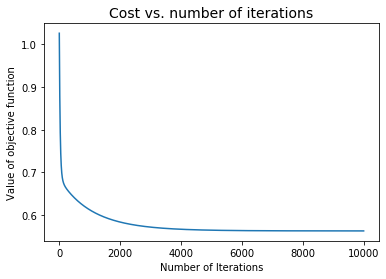

In [43]:
Iterations = list(range(10000))
plt.plot(Iterations, Cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Value of objective function')
plt.title('Cost vs. number of iterations', fontsize = 14)

### Performance on test data

In [44]:
predictions = (sigmoid(X_test.dot(theta)) >= 0.613)
predictions = (predictions == True).astype(int)

In [45]:
predictions

0      1
1      0
2      1
3      0
4      0
      ..
295    0
296    1
297    1
298    1
299    0
Length: 300, dtype: int32

In [47]:
y_test

0      1
1      0
2      1
3      0
4      0
      ..
295    0
296    1
297    1
298    1
299    0
Name: Test, Length: 300, dtype: int64

In [48]:
(predictions - y_test).value_counts()

 0    283
 1      9
-1      8
dtype: int64

In [50]:
#Root Mean Square Error
rmse_error = sum((predictions - y_test)**2)/len(y_test)
rmse_error

0.056666666666666664

### Confusion Matrix

In [51]:
data = {'y_Actual': y_test, 'y_Predicted': predictions}
df_conf = pd.DataFrame(data, columns = ['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames = ['Actual'], colnames = ['Predicted'])

In [52]:
confusion_matrix

Predicted,0,1
Actual,,
0,104,9
1,8,179


### Calculating F1 score

#### F1 Score: (2 * Precision * Recall)/(Precision + Recall)
#### Precision = TruePositives/(TruePositives + FalsePositives)
#### Recall = TruePositives/(TruePositives + FalseNegatives)

In [53]:
precision = confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])

In [54]:
precision

0.9521276595744681

In [55]:
recall = confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[0][1])

In [56]:
recall

0.9572192513368984

In [57]:
F1_score = (2*precision*recall)/(precision + recall)

In [58]:
F1_score

0.9546666666666667